In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt 
import seaborn as sns


df = pd.read_csv("data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [2]:
#Preprocessing

df.columns = df.columns.str.lower().str.replace(' ','_')
#convertir a lista solo las columnas que tengan dtype == object
string_columns = list(df.dtypes[df.dtypes =='object'].index)
for col in string_columns:
    #recorrer la lista creada y usar cada elemento para reemplazar su contenido por minusculas y los espacios por _
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<b>Visualization

<Axes: xlabel='msrp', ylabel='Count'>

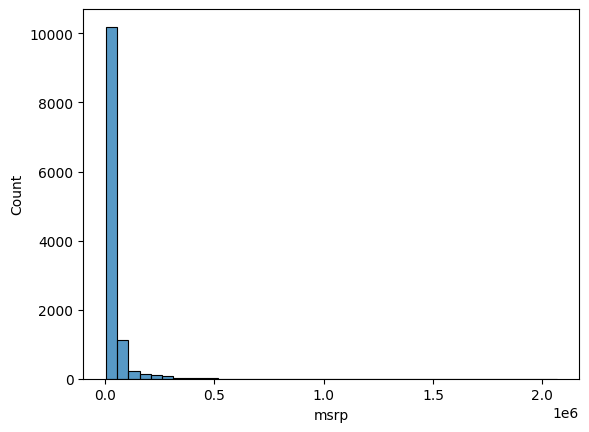

In [7]:
sns.histplot(df.msrp, bins=40)

<Axes: xlabel='msrp', ylabel='Count'>

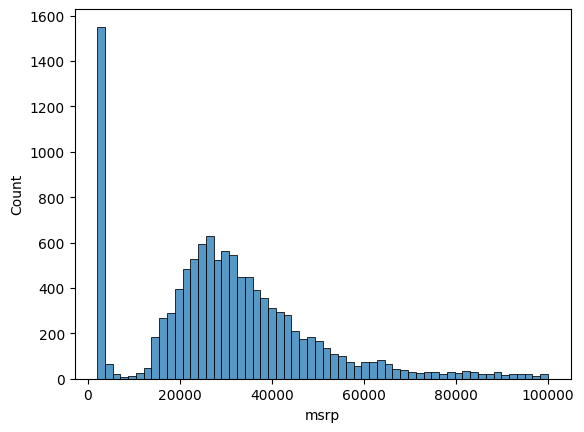

In [8]:
sns.histplot(df.msrp[df.msrp < 100000])

<Axes: xlabel='msrp', ylabel='Count'>

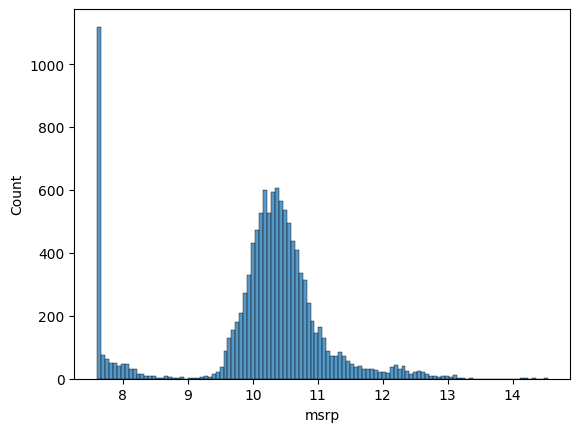

In [3]:
log_price = np.log1p(df.msrp)
sns.histplot(log_price)

<strong>Cheking for missing values 

In [10]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<B>Splitting the dataset in "validation", "test" and "training"

In [5]:
n = len(df)

n_valid = int( 0.2 * n)
n_test = int( 0.2 * n)

n_train = n - (n_valid + n_test) 

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_valid = df_shuffled.iloc[n_train:n_train+n_valid].copy()
df_test = df_shuffled.iloc[n_train+n_valid:].copy()
 





The analysis showed a long tail in the distribution of prices, to remove its effect we need to apply the log transformation

In [6]:
y_train = np.log1p(df_train.msrp.values)
y_valid = np.log1p(df_valid.msrp.values)
y_test = np.log1p(df_test.msrp.values)




Delete the target variable from the dataframes

In [7]:
del df_train['msrp']
del df_valid['msrp']
del df_test['msrp']

In [16]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


calculando pesos

In [9]:
def train_linear_regression(X,y):
    #adding the dummy column
    ones= np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    #normal equation formula

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

Selecting values from X

In [9]:
df.columns
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

df_num = df_train[base]

Filling Nan with zeros

In [10]:
df_num = df_num.fillna(0)

In [12]:
df_num.isna().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [12]:
X_train = df_num.values

Getting the right Weights

In [23]:
w_0, w = train_linear_regression(X_train, y_train)

Predicting prices

In [24]:
y_pred = w_0 + X_train.dot(w)

In [25]:
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

Visually 

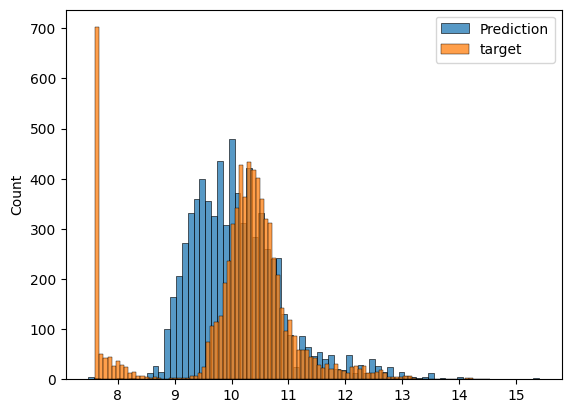

In [26]:
sns.histplot(y_pred, label='Prediction')
sns.histplot(y_train, label='target')
plt.legend()

Evaluating the model Quality

In [27]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [28]:
RMSE(y_train, y_pred)
# this means that on average, the model's predictions are 0.75 off

0.7554192603920132

Validating the model with validating dataset

In [34]:
df_num = df_valid[base]
df_num = df_num.fillna(0)
X_val = df_num.values

In [35]:
y_pred = w_0 + X_val.dot(w)

In [37]:
RMSE(y_valid, y_pred)

0.7616530991301562

The model produced a RMSE of 0.75 with the training dataset and 0.76 with the validation dataset, which will be the rmse that we use to compare to another models

Automatization of the preparation of X

In [38]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [39]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)      #Here we train the model using X_train to obtain the weights (w)

X_val = prepare_X(df_valid)
y_pred = w_0 + X_val.dot(w)                             #Here we try the model trained with the X_train 
print('validation: ', RMSE(y_valid, y_pred))

validation:  0.7616530991301562


We know that dataset was made in 2017 (df.year.max()), so we can calculate the age of the car by substracting the year when the car was made from 2017

In [54]:
df_train['age'] = 2017 - df_train.year

so we update the prepare_X function

In [81]:
def prepare_X(df):
    df = df.copy()      #copy so we dont alter the original
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')      #features is the new "base"

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [82]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_valid = prepare_X(df_valid)
y_pred = w_0 + X_valid.dot(w)
print("validation: ", RMSE(y_valid, y_pred))


validation:  0.5172055461058306


Adding the "age" of the car gives us a better RMSE, going from 0.76 to 0.51 

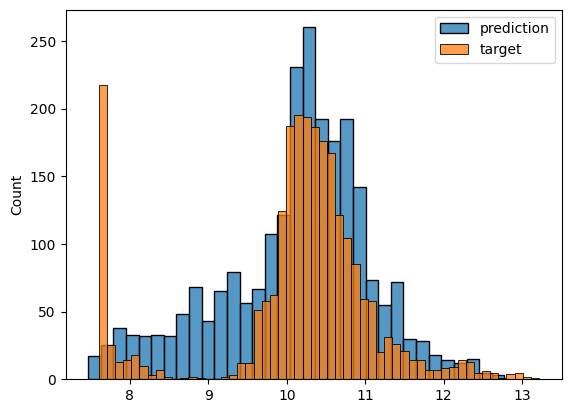

In [57]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_valid, label='target')
plt.legend()

Next, adding the number of doors in a car, which is a categorical variable <br>
we are going to use the "one-hot-encoding", (dummies) using 3 new columns for the posibilities. <br>
num-doors-2, num-doors-3, num-doors-4.

In [ ]:
#esto se agrega a prepare_X

for v in [2,3,4]:
    feature = 'numv_of_doors_%s' % v
    value = (df['number_of_doors'] == v).astype(int)
    df[feature] = value
    features.append(feature)

Now we want to add the top makers as a numerical (from categorical)

In [73]:
df['make'].value_counts().head()

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [ ]:
#this goes inside prepare_X too
for v in ['chevrolet','ford','volkswagen','toyota','dodge']:
    feature = 'is_make_%s' % v
    df[feature] = (df['make'] == v).astype(int)
    features.append(feature``)

Summing up

In [15]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    
    for v in [2,3,4]:
        feature = 'num_of_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet','ford','volkswagen','toyota','dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


testing the new model with "year" and "maker" included

In [16]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_valid = prepare_X(df_valid)
y_pred = w_0 + X_valid.dot(w)

print('validation: ', RMSE(y_valid, y_pred))

validation:  0.7348298707866141


<h2> Este si

In [143]:
def prepare_X(df):
    df = df.copy()

    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)
    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
        'premium_unleaded_(recommended)', 
        'flex-fuel_(unleaded/e85)']: 
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)
    for v in ['automatic', 'manual', 'automated_manual']: 
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
    for v in ['front_wheel_drive', 'rear_wheel_drive',
        'all_wheel_drive', 'four_wheel_drive']: 
        feature = 'is_driven_wheels_%s' % v
        df[feature] = (df['driven_wheels'] == v).astype(int)
        features.append(feature)
    for v in ['crossover', 'flex_fuel', 'luxury', 
        'luxury,performance', 'hatchback']: 
        feature = 'is_mc_%s' % v
        df[feature] = (df['market_category'] == v).astype(int)
        features.append(feature)
    for v in ['compact', 'midsize', 'large']: 
        feature = 'is_size_%s' % v
        df[feature] = (df['vehicle_size'] == v).astype(int)
        features.append(feature)
    for v in ['sedan', '4dr_suv', 'coupe', 'convertible',
        '4dr_hatchback']: 
        feature = 'is_style_%s' % v
        df[feature] = (df['vehicle_style'] == v).astype(int)
        features.append(feature) 
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

# los dos comentados dan problemas y elevan el rmse a la reconchetumare,
# the reason is "numerical insstability" crea un conflicto al tratar de invertirla, por eso da el error "singular matrix"
#numerical instability issues'


<h3>para esto (considerando los comentados), tenemos que regularizar

In [147]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train)

X_valid = prepare_X(df_valid)
y_pred = w_0 + X_valid.dot(w)

print('prediction culia: ', rmse(y_valid, y_pred))

prediction culia:  319.7881122794543


<h2>Regularizado

In [146]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])          #este bien
    X = np.column_stack([ones, X])      #este bien

    XTX = X.T.dot(X)                    #este bien
    reg = r * np.eye(XTX.shape[0])      #este bien
    XTX = XTX + reg                     #este bien

    XTX_inv = np.linalg.inv(XTX)        #este bien
    w = XTX_inv.dot(X.T).dot(y)         #este bien

    return w[0], w[1:]


In [20]:
df_train.shape, df_valid.shape, df_test.shape

((7150, 15), (2382, 15), (2382, 15))

In [19]:
y_test.shape, y_valid.shape, y_valid.shape

((2382,), (2382,), (2382,))

In [148]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train,y_train,r=0.001)


X_valid = prepare_X(df_valid)
y_pred = w_0 + X_valid.dot(w)
print('prediction rmse : ', rmse(y_valid, y_pred))

X_test = prepare_X(df_test)
y_pred_test = w_0 + X_test.dot(w)
print('test rmse: ', rmse(y_test, y_pred_test))     #pq usa y_test aca...

prediction rmse :  0.46022676190208556
test rmse:  1.1005926982605514


<H3> Using the model

In [149]:
categorical_columns = ['number_of_doors','make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
                            'market_category', 'vehicle_size', 'vehicle_style', 'engine_hp', 'engine_cylinders']

In [150]:
ad = { 
    'make': 'toyota', 
    'model':'venza', 
    'year': 2013, 
    'engine_fuel_type':'regular_unleaded', 
    'engine_hp':268.0,
    'engine_cylinders':6.0, 
    'transmission_type':'automatic', 
    'driven_wheels': 'all_wheel_drive',
    'number_of_doors':4.0, 
    'market_category': 'crossover,performance', 
    'vehicle_size':'midsize', 
    'vehicle_style':'wagon',
    'highway_mpg':25, 
    'city_mpg':18, 
    'popularity':2031
}

In [153]:
df_test = pd.DataFrame([ad])
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

array([28294.64008778])

<H3> HASTA AQUI ARRIBA FUCIONA BIEN

<h2>All in order

In [3]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']
n = len(df)

n_valid = int( 0.2 * n)
n_test = int( 0.2 * n)

n_train = n - (n_valid + n_test) 

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

"""
        definiendo los dataframes
"""
df_train = df_shuffled.iloc[:n_train].copy()
df_valid = df_shuffled.iloc[n_train:n_train+n_valid].copy()
df_test = df_shuffled.iloc[n_train+n_valid:].copy()

"""
        sacando target de cada uno
"""
y_train = np.log1p(df_train.msrp.values)
y_valid = np.log1p(df_valid.msrp.values)
y_test = np.log1p(df_test.msrp.values)
del df_train['msrp']
del df_valid['msrp']
del df_test['msrp']






<H3> Hasta aca arriba todo bien, solo definiendo

In [4]:

"""
Funcion para calcular rmse
"""

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

"""
funcion para linear regresion no regularizada
"""
def train_linear_regression(X,y):
    #adding the dummy column
    ones= np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    #normal equation formula

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

"""
funcion para linear regression regularizada
"""
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])          
    X = np.column_stack([ones, X])      

    XTX = X.T.dot(X)                    
    reg = r * np.eye(XTX.shape[0])      
    XTX = XTX + reg                     

    XTX_inv = np.linalg.inv(XTX)        
    w = XTX_inv.dot(X.T).dot(y)         

    return w[0], w[1:]

"""
HASTA ACA BIEN, HAY QUE CAMBIAR LO DE ABAJO





Binary code for categorical variables



def binary_encode(df, categorical_column, top_n_values):
    df = df.copy()
   
    
    # Get the top n most frequent values in the specified column
    top_values = df[categorical_column].value_counts().index[:top_n_values]
    
    # Initialize a list to store feature names
    encoded_features = []
    
    # Iterate through the top values and create binary-encoded columns
    for value in top_values:
        feature_name = f'is_{categorical_column}_{value}'
        df[feature_name] = (df[categorical_column] == value).astype(int)
        encoded_features.append(feature_name)
    
    return df, encoded_features



#Prepare X 
def prepare_X(df):   #, categorical_vars):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    # Iterate through other categorical columns for binary encoding
    categorical_columns = ['number_of_doors','make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
                            'market_category', 'vehicle_size', 'vehicle_style']
    #categorical_columns.extend(categorical_vars)
    
    for column in categorical_columns:
        df, encoded_features = binary_encode(df, column, 9)  # Adjust 'top_n_values' as needed
        features.extend(encoded_features)           
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X




 """

"\nHASTA ACA BIEN, HAY QUE CAMBIAR LO DE ABAJO\n\n\n\n\n\nBinary code for categorical variables\n\n\n\ndef binary_encode(df, categorical_column, top_n_values):\n    df = df.copy()\n   \n    \n    # Get the top n most frequent values in the specified column\n    top_values = df[categorical_column].value_counts().index[:top_n_values]\n    \n    # Initialize a list to store feature names\n    encoded_features = []\n    \n    # Iterate through the top values and create binary-encoded columns\n    for value in top_values:\n        feature_name = f'is_{categorical_column}_{value}'\n        df[feature_name] = (df[categorical_column] == value).astype(int)\n        encoded_features.append(feature_name)\n    \n    return df, encoded_features\n\n\n\n#Prepare X \ndef prepare_X(df):   #, categorical_vars):\n    df = df.copy()\n    features = base.copy()\n    \n    df['age'] = 2017 - df.year\n    features.append('age')\n    \n    # Iterate through other categorical columns for binary encoding\n    c

<h3> Defining the categorical columns 

In [232]:
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [7]:
def binary(df, column, n_values):
    df= df.copy()
    features = base.copy()
    for elem in  df[column].value_counts().head(n_values).index.tolist():#df[column].value_counts().head(n_values).index:
        binary_column_name = f'{column}_{elem}'
        df[binary_column_name] = (df[column] == elem).astype(int)
        features.append(binary_column_name)
    
    return df, features    #devuelve lista

In [ ]:
prueba_base = base.copy()
prueba_base.extend(pichulonn)

In [ ]:
prueba_base = base.copy()
prueba_base.extend(pichulonn)

In [ ]:
prueba_base = base.copy()
prueba_base.extend(pichulonn)

In [22]:
dfdf, pichulonn = binary(df_train,'make',7)
dfdf1, pichulon = binary(dfdf,'market_category',7)

In [23]:
dfdf1

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,...,make_dodge,make_nissan,make_gmc,market_category_crossover,market_category_flex_fuel,market_category_luxury,market_category_hatchback,"market_category_luxury,performance",market_category_performance,"market_category_crossover,luxury"
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,...,0,0,0,0,0,0,1,0,0,0
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,...,0,0,0,0,0,0,1,0,0,0
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",...,0,0,0,0,0,0,0,1,0,0
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",...,0,0,0,0,0,0,0,0,0,0
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,...,0,0,1,0,1,0,0,0,0,0
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",...,0,0,0,0,0,0,0,0,0,0


In [17]:
type(pichulonn)

list

In [18]:
def prepare_X(df):   #, categorical_vars):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    # Iterate through other categorical columns for binary encoding
    categorical_columns = ['number_of_doors','make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
                            'market_category', 'vehicle_size', 'vehicle_style']
    #categorical_columns.extend(categorical_vars)
    
    for column in categorical_columns:
        encoded_features = binary(df, column, 9)  # aca se guarda "features"
        features.extend(encoded_features)           

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X


In [1]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r= 0.01)

X_train.shape, w_0.shape, w.shape

NameError: name 'prepare_X' is not defined

In [229]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r= 0.01)

X_valid = prepare_X(df_valid)
y_pred = w_0 + X_valid.dot(w)

print('predic; ', rmse(y_valid, y_pred))

AttributeError: 'tuple' object has no attribute 'shape'